# Redacción del problema
7. Sistema de inventarios con revisión periódica: Un negocio revisa su inventario cada 5 días. Si el nivel de inventario es menor a 40 unidades, realiza un pedido de reabastecimiento para que el nivel suba a 90 unidades. La demanda diaria sigue una distribución normal con media de 6 unidades y desviación estándar de 2 unidades. Simula el sistema durante 15 semanas.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Parámetros del problema
demanda_media = 6
desviacion_std = 2
dias_para_ordenar = 5 # La revisión de inventario se hace cada 5 días
# En la redacción del problema no se menciona la cantidad del inventario inicial, asumí que iniciamos con inventario completo
inventario_inicial = 90
dias_a_simular = 15*7 # Debemos simular 15 semanas

In [4]:
def generar_normal(media = demanda_media, std_dev = desviacion_std, size=dias_a_simular):
    # Como debemos simular 15 semanas (105 días) generamos 106 días para poder concatenar z1 y z2
    u1 = np.random.uniform(0, 1, size//2+1)
    u2 = np.random.uniform(0, 1, size//2+1)
    
    R = np.sqrt(-2 * np.log(u1))
    Theta = 2 * np.pi * u2

    # Se suma la media y se multiplica la desviación estándar para generar una normal con los parámetros deseados
    z1 = media + std_dev * R * np.cos(Theta)
    z2 = media + std_dev * R * np.sin(Theta)
    
    return np.concatenate([z1, z2])

In [5]:
# Tomamos únicamente 105 días
demandas = generar_normal()[:105].astype(int) # Convertimos los números en enteros, ya que no se pueden vender fracciones de piezas

In [6]:
inventario = inventario_inicial

for dia in range(0, dias_a_simular):

    if demandas[dia] <= inventario:
        inventario -= demandas[dia]
        print(f"Dia: {dia+1}, Inventario restante: {inventario}, Demanda: {demandas[dia]}")
    else:
        # Si no hay suficiente inventario indicamos que no se pudo abastecer la demanda
        print(f"Dia: {dia+1}, Inventario restante: {inventario}, Demanda: {demandas[dia]}, No se pudo abastecer la demanda")

    if (dia+1) % dias_para_ordenar == 0: # Cada 5 días revisamos el inventario restante
        # Si el inventario restante es menor a 40
        if inventario < 40:
            print(f"Dia: {dia+1}, Inventario reabastecido: {90 - inventario}") # Se reestablce el inventario a 90, por lo que se compran 90 menos los que quedan
            inventario = 90

Dia: 1, Inventario restante: 82, Demanda: 8
Dia: 2, Inventario restante: 75, Demanda: 7
Dia: 3, Inventario restante: 69, Demanda: 6
Dia: 4, Inventario restante: 63, Demanda: 6
Dia: 5, Inventario restante: 56, Demanda: 7
Dia: 6, Inventario restante: 50, Demanda: 6
Dia: 7, Inventario restante: 49, Demanda: 1
Dia: 8, Inventario restante: 40, Demanda: 9
Dia: 9, Inventario restante: 36, Demanda: 4
Dia: 10, Inventario restante: 28, Demanda: 8
Dia: 10, Inventario reabastecido: 62
Dia: 11, Inventario restante: 84, Demanda: 6
Dia: 12, Inventario restante: 82, Demanda: 2
Dia: 13, Inventario restante: 74, Demanda: 8
Dia: 14, Inventario restante: 72, Demanda: 2
Dia: 15, Inventario restante: 65, Demanda: 7
Dia: 16, Inventario restante: 58, Demanda: 7
Dia: 17, Inventario restante: 53, Demanda: 5
Dia: 18, Inventario restante: 47, Demanda: 6
Dia: 19, Inventario restante: 43, Demanda: 4
Dia: 20, Inventario restante: 35, Demanda: 8
Dia: 20, Inventario reabastecido: 55
Dia: 21, Inventario restante: 87, D

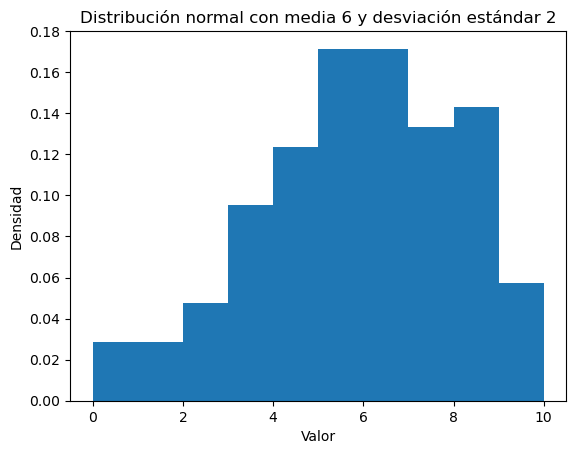

In [7]:
plt.hist(demandas, bins=10, density='True')
plt.title("Distribución normal con media 6 y desviación estándar 2")
plt.xlabel("Valor")
plt.ylabel("Densidad")
plt.show();

## Conclusión

Luego de realizar este problema, podemos concluir que los tiempos de reorden son bastante buenos, ya que son muy pocos los días en los que el se queda sin inventario, claro que hay cuestiones que no se toman en cuenta, como puede ser el tiempo que tarda el pedido en llegar o el inventario de reserva, pero con lo que se toma en cuenta, para ser un sistema bastante efectivo tanto para el cliente como para el negocio.

De la gráfica podemos concluir, que la distribución normal con media 6 y desviación estándar 2 fue generada efectivamente mediante el método de Box-Muller cubierto en las sesiones de clase.